# we will use [NetworkX](https://networkx.org/documentation/stable/) and [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/) packages to help us implement graph neural networks.

## Setup

In [1]:
pip install torch torchvision torchaudio

In [ ]:
pip install torch-geometric

In [ ]:
pip install networkx matplotlib

## Import Necessary Libraries
PyTorch Geometric has two classes for storing and/or transforming graphs into tensor format. One is `torch_geometric.datasets`, which contains a variety of common graph datasets. Another is `torch_geometric.data`, which provides the data handling of graphs in PyTorch tensors.

In [1]:
# Import necessary libraries
import torch
import torch.nn.functional as F
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx

## Load the Dataset
The Karate Club dataset represents a social network of a university karate club, where nodes represent members of the club, and edges represent ties between members.

In [2]:
# Load the Karate Club dataset
dataset = KarateClub()
data = dataset[0]  # Get the graph object

# Print some information about the graph
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Number of node features: {data.num_node_features}')
print(f'Number of classes: {dataset.num_classes}')

print('Dataset attribute information:', data)

Number of nodes: 34
Number of edges: 156
Number of node features: 34
Number of classes: 4
Dataset attribute information: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [3]:
# From the above output we know that 'data' has 4 attributes: x, edge_index, y and train_mask
# Print the attributes
print(f'x attribute: {data.x}')
print(f'x attribute shape: {data.x.shape}')
print('====================')

# edge index is a 2 by 156 matrix where the elements [0,i] and [1, i] in the matrix
# represents one edge
# hence, if we print its transpose, we can get all the edges connections.
print(f'edge index shape: {data.edge_index.shape}')
print(f'edge index: {data.edge_index}')
print(f'edge index transpose: {data.edge_index.T}')
print('====================')

# y attributes represents the class labels
print(f'y attribute: {data.y}')
print('====================')

# train_mask corresponds to a node in the graph, and its value indicates whether 
# the node should be included in the training set (True) or not (False). 
print(f'train_mask: {data.train_mask}')

x attribute: tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
x attribute shape: torch.Size([34, 34])
edge index shape: torch.Size([2, 156])
edge index: tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33

## Visualization of the dataset
We now visualize the graph dataset where the nodes represent the club members and the edges represent the interactions between them. 
The color of the nodes is determined by different rules:
1. by their degree, illustrating a simple way to visualize node features or metadata.
2. by their classes

In [4]:
# Convert to a networkx graph object
G = to_networkx(data, to_undirected=True)

# Print information about the converted object
print('What is the G object?')
print(G)
print("===================================")
print('Nodes in the graph')
print(G.nodes())
print("===================================")
print('How many edges for each node?')
print(G.degree())

What is the G object?
Graph with 34 nodes and 78 edges
Nodes in the graph
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
How many edges for each node?
[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


C:\Users\decis\anaconda3\envs\kaveh\Lib\site-packages\networkx\drawing\nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


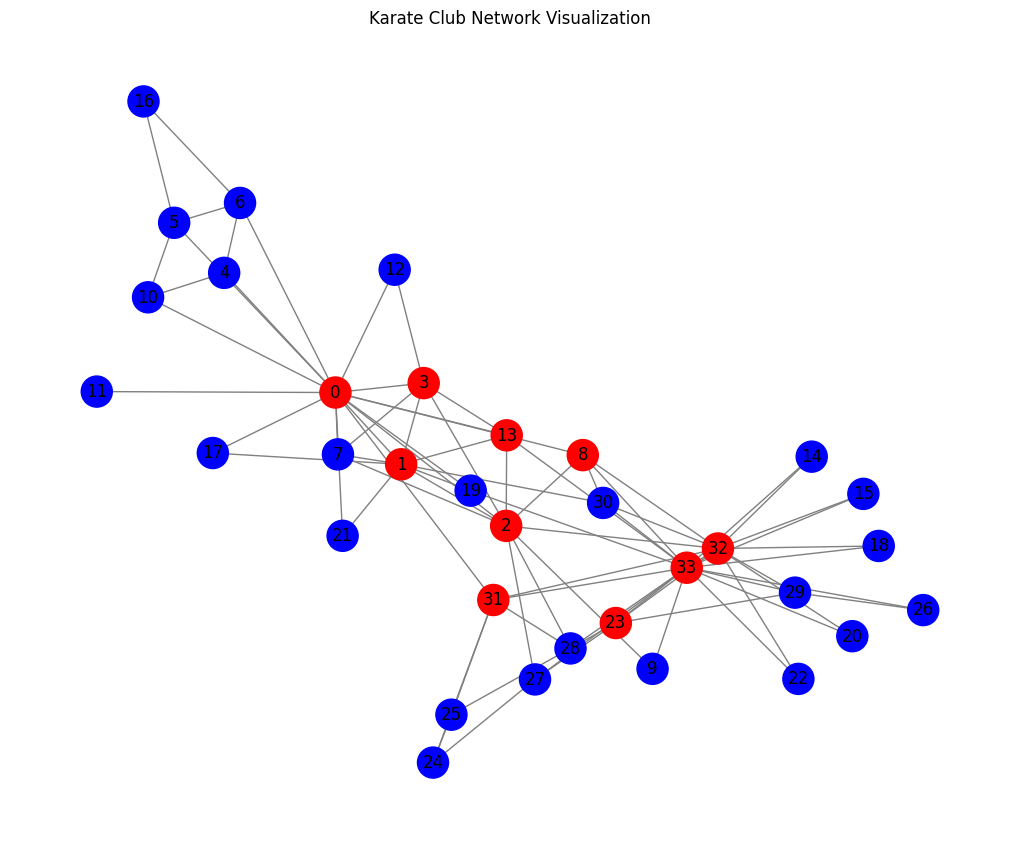

In [5]:
# Assign colors to nodes (for example, based on some node feature or metadata)
# Here, we use a simple rule: nodes with degree > the average degree are red, others are blue
avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
colors = ['red' if G.degree(node) > avg_degree else 'blue' for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, node_color=colors, with_labels=True, node_size=500, edge_color='gray', cmap='coolwarm')
plt.title('Karate Club Network Visualization')
plt.show()

## to visualize the dataset by their classes. From the graph information above, we know that the Karate Club network dataset has 4 classes.
- Hint: use 'data.y' to assign colors

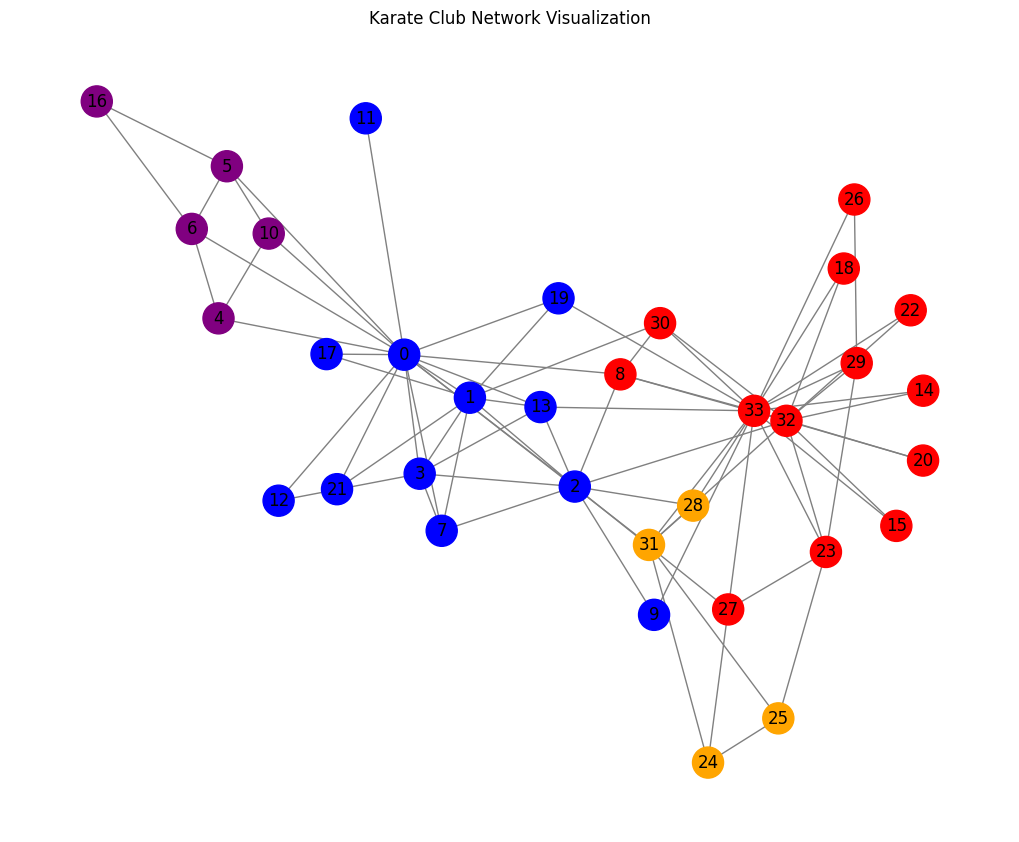

In [6]:
# Assign colors based on their classes
color_map = ['red', 'blue', 'orange', 'purple']
color=[color_map[data.y[node]] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, node_color=color, with_labels=True, node_size=500, edge_color='gray', cmap='coolwarm')
plt.title('Karate Club Network Visualization')
plt.show()

## Define the Graph Convolutional Network (GCN) Model
As we taught in the lecture, GCN layer is defined as an operation on a node and its neighbors, which involves aggregating features from the node's neighbors and combining the node's own features. This process can be repeated across several layers, allowing the network to consider information from larger and larger neighborhoods around each node.

PyG implements this layer via [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv), which can be executed by passing in the node feature representation `x` and the COO graph connectivity representation `edge_index`.

Here, we first initialize all of our building blocks in `__init__` and define the computation flow of our network in `forward`.
We first define and stack **two graph convolution layers**. Each layer corresponds to aggregating information from each node's 1-hop neighborhood (its direct neighbors), but when we compose the layers together, we are able to aggregate information from each node's 2-hop neighborhood (all nodes up to 2 "hops" away).

**Why not include a softmax?** We do not apply a softmax here on the output because **F.cross_entropy()** in PyTorch includes the softmax operation internally. When you use F.cross_entropy(), it combines the softmax and the negative log likelihood loss in a single function. This means you should pass the raw output (logits) of your model directly to F.cross_entropy() without applying softmax to them first.

**Do we need a linear layer?** For node-level classification tasks, you might not always need a linear layer after the graph convolutional layers (GCLs).  Especially in simpler models or when working with very small datasets (such as our Karate Club dataset), it might be beneficial to reduce the model complexity to prevent overfitting. In such cases, you might opt to omit additional linear layers.

In [7]:
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, output_channels)

    def forward(self, x, edge_index):
        # First GCN layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        
        # Second GCN layer
        x = self.conv2(x, edge_index)
        
        return x

## Train the Model
Training our model is very similar to any other PyTorch model. 
We initialize a Adam gradient optimizer and use cross entropy loss.

In [8]:
# Initialize the model
hidden_channels = 16
model = GCN(dataset.num_node_features, hidden_channels, dataset.num_classes)

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def accuracy():
    model.eval()
    pred = model(data.x, data.edge_index)
    # get the predited class
    _, pred = pred.max(dim=1)
    correct = int(pred.eq(data.y).sum().item())
    accuracy = correct / len(data.y)
    return accuracy

# Training loop
for epoch in range(100):
    optimizer.zero_grad()           
    out = model(data.x, data.edge_index)
    # Compute the loss solely based on the training nodes.
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    # Derive gradients.
    loss.backward()
    # Update parameters based on gradients.
    optimizer.step()
    print(f'Epoch {epoch+1}: Loss: {loss.item()}')
    print(f'Test Accuracy for {epoch+1}: {accuracy()}')
    print('=====================================')

Epoch 1: Loss: 1.399276852607727
Test Accuracy for 1: 0.6470588235294118
Epoch 2: Loss: 1.3758578300476074
Test Accuracy for 2: 0.6764705882352942
Epoch 3: Loss: 1.353447437286377
Test Accuracy for 3: 0.7058823529411765
Epoch 4: Loss: 1.3315844535827637
Test Accuracy for 4: 0.7058823529411765
Epoch 5: Loss: 1.310556411743164
Test Accuracy for 5: 0.7058823529411765
Epoch 6: Loss: 1.2891757488250732
Test Accuracy for 6: 0.7352941176470589
Epoch 7: Loss: 1.267284870147705
Test Accuracy for 7: 0.6764705882352942
Epoch 8: Loss: 1.2444093227386475
Test Accuracy for 8: 0.6764705882352942
Epoch 9: Loss: 1.2202626466751099
Test Accuracy for 9: 0.6764705882352942
Epoch 10: Loss: 1.1958816051483154
Test Accuracy for 10: 0.6764705882352942
Epoch 11: Loss: 1.1716632843017578
Test Accuracy for 11: 0.6764705882352942
Epoch 12: Loss: 1.1465706825256348
Test Accuracy for 12: 0.6764705882352942
Epoch 13: Loss: 1.1206642389297485
Test Accuracy for 13: 0.7058823529411765
Epoch 14: Loss: 1.0940355062484741

## Define a GraphSAGE network
GraphSAGE (Graph Sample and Aggregation) extends the idea of convolutional neural networks to graph data by learning a function that aggregates feature information from a node’s local neighborhood.

In GraphSAGE layer, you can choose different ways to aggregate neighbours, such as mean, max, sum, etc.

PyG implements the graphSAGE layer via [`SAGEConv`](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.conv.SAGEConv.html)'. Similarly to [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv), it can be executed by passing in the node feature representation `x` and the COO graph connectivity representation `edge_index`. You can specify the aggregation method by setting **aggr** as the approach you want.

**Exercise** 
Define your graphSAGE model with at least two graphSAGE layers.
Play with different aggregation methods with each layer.
Do not forget to include non-linear layer.

In [8]:
from torch_geometric.nn import SAGEConv

class SAGE(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
        super(SAGE, self).__init__()
        self.conv1 = SAGEConv(input_channels, hidden_channels, aggr='sum') #aggr='max' ...
        self.conv2 = SAGEConv(hidden_channels, output_channels, aggr='mean')

    def forward(self, x, edge_index):
        # First SAGE layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        
        # Second SAGE layer
        x = self.conv2(x, edge_index)

        return x

In [9]:
# Initialize the model
hidden_channels = 16
model = SAGE(dataset.num_node_features, hidden_channels, dataset.num_classes)

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def accuracy():
    model.eval()
    pred = model(data.x, data.edge_index)
    # get the predited class
    _, pred = pred.max(dim=1)
    correct = int(pred.eq(data.y).sum().item())
    accuracy = correct / len(data.y)
    return accuracy

# Training loop
for epoch in range(100):
    optimizer.zero_grad()           
    out = model(data.x, data.edge_index)
    # Compute the loss solely based on the training nodes.
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    # Derive gradients.
    loss.backward()
    # Update parameters based on gradients.
    optimizer.step()
    print(f'Epoch {epoch+1}: Loss: {loss.item()}')
    print(f'Test Accuracy for {epoch+1}: {accuracy()}')
    print('=====================================')

Epoch 1: Loss: 1.3799920082092285
Test Accuracy for 1: 0.38235294117647056
Epoch 2: Loss: 1.2481331825256348
Test Accuracy for 2: 0.47058823529411764
Epoch 3: Loss: 1.1420917510986328
Test Accuracy for 3: 0.5
Epoch 4: Loss: 1.0424318313598633
Test Accuracy for 4: 0.5294117647058824
Epoch 5: Loss: 0.949965238571167
Test Accuracy for 5: 0.5588235294117647
Epoch 6: Loss: 0.859861433506012
Test Accuracy for 6: 0.5294117647058824
Epoch 7: Loss: 0.7706475257873535
Test Accuracy for 7: 0.5
Epoch 8: Loss: 0.6865556240081787
Test Accuracy for 8: 0.5
Epoch 9: Loss: 0.6105406880378723
Test Accuracy for 9: 0.5
Epoch 10: Loss: 0.5415287017822266
Test Accuracy for 10: 0.47058823529411764
Epoch 11: Loss: 0.47855937480926514
Test Accuracy for 11: 0.47058823529411764
Epoch 12: Loss: 0.4206303358078003
Test Accuracy for 12: 0.5294117647058824
Epoch 13: Loss: 0.366492360830307
Test Accuracy for 13: 0.5294117647058824
Epoch 14: Loss: 0.31560835242271423
Test Accuracy for 14: 0.5294117647058824
Epoch 15: L

## Define a graph attention networks
Not all node's neighbours are equally important. Graph attention network addresses this by incorporating the attention mechanism, which computes attention coefficients to determine the importance of each neighbor's features.

PyG implements the graph attention layer via [`GATConv`](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.conv.GATConv.html)'. Similarly to [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv), it can be executed by passing in the node feature representation `x` and the COO graph connectivity representation `edge_index`. You can also set **return_attention_weights** as True to get the trained attention weights. 

**Exercise** 
Define your GAT with at least two graph attention layers.
Hint: do not forget to include non-linear layer.

In [10]:
from torch_geometric.nn import GATConv

class GAT(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
        super(GAT, self).__init__()
        self.conv1 = GATConv(input_channels, hidden_channels)
        self.conv2 = GATConv(hidden_channels, output_channels)

    def forward(self, x, edge_index):
        # First GAT layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        
        # Second GAT layer
        x, attn = self.conv2(x, edge_index, return_attention_weights=True)
        
        return x, attn

## Train your GAT model similarly as our previous code of training GCN model.

However, in addition to training the model as before. **YOU ALSO NEED TO**

1. For each epoch, print out the trained attention weights of the last GAT layer. See how they change during training and use them to help you understand the attention mechanism.
2. Print out the shape of trained attention weights. What is it? Why? Justify the answer.

In [15]:
# Initialize the model
hidden_channels = 16
model = GAT(dataset.num_node_features, hidden_channels, dataset.num_classes)

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def accuracy():
    model.eval()
    pred, attn = model(data.x, data.edge_index)
    _, pred = pred.max(dim=1)
    correct = int(pred.eq(data.y).sum().item())
    accuracy = correct / len(data.y)
    return accuracy

# Training loop
for epoch in range(100):
    optimizer.zero_grad()           
    out, attn = model(data.x, data.edge_index)
    # Compute the loss solely based on the training nodes.
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    # Derive gradients.
    loss.backward()
    # Update parameters based on gradients.
    optimizer.step()
    print(f'Epoch {epoch+1}: Loss: {loss.item()}')
    print(f'Test Accuracy for {epoch+1}: {accuracy()}')
    print(attn[1])
    print(attn[0].shape)
    print(attn[1].shape)
    print('=====================================')

## Attention weights has dim=190. 
## Why? Check out attn[0].T. It includes attention weights for all the edges(156) and the edge of a node to itself (34).
## Hence, 190 = 156+34

Epoch 1: Loss: 1.3810721635818481
Test Accuracy for 1: 0.5294117647058824
tensor([[0.0988],
        [0.0868],
        [0.1416],
        [0.2488],
        [0.1993],
        [0.1987],
        [0.1964],
        [0.1520],
        [0.2494],
        [0.4981],
        [0.3343],
        [0.1655],
        [0.3347],
        [0.2503],
        [0.3326],
        [0.1332],
        [0.0584],
        [0.0860],
        [0.1413],
        [0.1960],
        [0.1652],
        [0.3341],
        [0.2499],
        [0.3320],
        [0.1824],
        [0.0619],
        [0.1042],
        [0.1526],
        [0.2132],
        [0.1765],
        [0.3537],
        [0.1716],
        [0.2086],
        [0.2571],
        [0.0819],
        [0.0587],
        [0.0992],
        [0.0887],
        [0.1972],
        [0.3358],
        [0.1662],
        [0.0590],
        [0.2005],
        [0.2518],
        [0.0587],
        [0.1996],
        [0.2506],
        [0.3324],
        [0.0593],
        [0.2523],
        [0.2021],
        

## Multihead Attention
Now try to extend your implementation of graph attention network with multi-head attention.

Use attention head = 4 for any GAT Layer except the last layer. For each epoch, print out the trained attention weights of the GAT layer with multi-head setting. What is the shape? Justify the answer. 


Hint: the output of multiheads layer is concatenated, what would be the resulting dimension? 

In [16]:
class GAT(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
        super(GAT, self).__init__()
        self.conv1 = GATConv(input_channels, hidden_channels, heads=4)
        # The first layer uses 4 attention heads, and the output is concatenated, resulting in hidden_dim * 4 features per node. 
        self.conv2 = GATConv(hidden_channels*4 , output_channels)

    def forward(self, x, edge_index):
        # First GCN layer
        x, attn = self.conv1(x, edge_index, return_attention_weights=True)
        x = F.relu(x)
        
        # Second GCN layer
        x = self.conv2(x, edge_index)
        
        return x, attn

In [17]:
# Initialize the model
hidden_channels = 16
model = GAT(dataset.num_node_features, hidden_channels, dataset.num_classes)

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def accuracy():
    model.eval()
    pred, attn = model(data.x, data.edge_index)
    _, pred = pred.max(dim=1)
    correct = int(pred.eq(data.y).sum().item())
    accuracy = correct / len(data.y)
    return accuracy

# Training loop
for epoch in range(100):
    optimizer.zero_grad()           
    out, attn = model(data.x, data.edge_index)
    # Compute the loss solely based on the training nodes.
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    # Derive gradients.
    loss.backward()
    # Update parameters based on gradients.
    optimizer.step()
    print(f'Epoch {epoch+1}: Loss: {loss.item()}')
    print(f'Test Accuracy for {epoch+1}: {accuracy()}')
    print(attn[1].shape)
    print('=====================================')

## Attention weights with single head has dim=190. 
## Attention weights with head=4 would result in dim=190 * 4.

Epoch 1: Loss: 1.3952276706695557
Test Accuracy for 1: 0.5588235294117647
torch.Size([190, 4])
Epoch 2: Loss: 1.3455283641815186
Test Accuracy for 2: 0.6764705882352942
torch.Size([190, 4])
Epoch 3: Loss: 1.3010644912719727
Test Accuracy for 3: 0.8235294117647058
torch.Size([190, 4])
Epoch 4: Loss: 1.258910894393921
Test Accuracy for 4: 0.8235294117647058
torch.Size([190, 4])
Epoch 5: Loss: 1.2151025533676147
Test Accuracy for 5: 0.8235294117647058
torch.Size([190, 4])
Epoch 6: Loss: 1.1688430309295654
Test Accuracy for 6: 0.8235294117647058
torch.Size([190, 4])
Epoch 7: Loss: 1.1194002628326416
Test Accuracy for 7: 0.8529411764705882
torch.Size([190, 4])
Epoch 8: Loss: 1.0666131973266602
Test Accuracy for 8: 0.8529411764705882
torch.Size([190, 4])
Epoch 9: Loss: 1.0108134746551514
Test Accuracy for 9: 0.8529411764705882
torch.Size([190, 4])
Epoch 10: Loss: 0.952534556388855
Test Accuracy for 10: 0.8529411764705882
torch.Size([190, 4])
Epoch 11: Loss: 0.8922394514083862
Test Accuracy f

## A more complex dataset
Now we have played with a simple, small and **node-level** dataset with only 34 nodes and 156 edges.
Let's load a more complex dataset MUTAG.

MUTAG: A dataset of 188 chemical compounds divided into two classes according to their mutagenic effect on a bacterium.
This dataset is a **graph-level** dataset that each chemical compound is represented as a graph where nodes are atoms, and edges are chemical bonds. The 188 graphs are classified into two categories based on their mutagenic effect on a bacterium.

In [19]:
from torch_geometric.datasets import TUDataset

# Load the MUTAG dataset
dataset = TUDataset(root='/tmp/MUTAG', name='MUTAG')

# Print some information about the dataset
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print (dataset)

# Access the first graph in the dataset
# Note that in this case, we have 188 graphs in the dataset. Each graph represents one chemical compound
data = dataset[0]
print(f'\nFirst graph in the dataset: {data}')
print('===============================')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: MUTAG(188):
Number of graphs: 188
Number of features: 7
Number of classes: 2
MUTAG(188)

First graph in the dataset: Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])
Number of nodes: 17
Number of edges: 38
Average node degree: 2.24
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


## Visualization of one graph
The visualization represents one chemical compound.

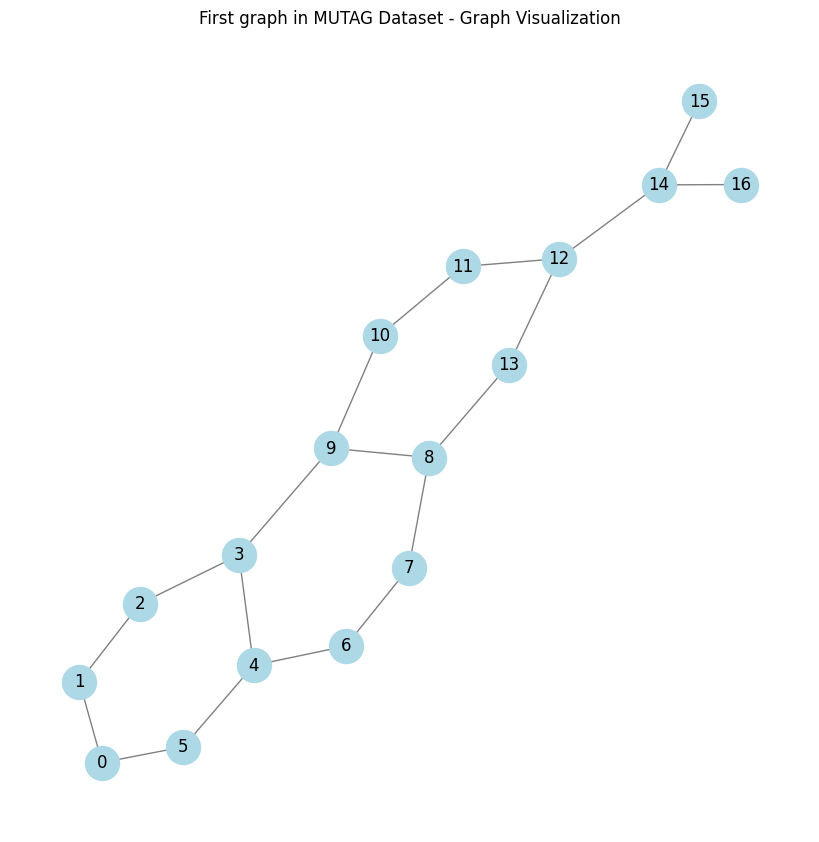

In [20]:
# Convert the graph to a NetworkX graph for visualization
G = to_networkx(data, to_undirected=True)

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=600)
plt.title('First graph in MUTAG Dataset - Graph Visualization')
plt.show()

## Define your GCN, GraphSAGE and GAT for the MUTAG dataset. Feel free to use different aggregation methods for SAGE layer or multihead attention for GAT layers.

**Do we need a linear layer?** For graph-level tasks, after aggregating node features, a linear layer (or more) can be beneficial to transform the pooled feature vector into the final prediction. 


**How is it different from node-level classification?** Since the task is to classify the entire graph instead of for every node, you will need to aggregate the representations of all the nodes and potentially the edges to form a graph-level representation.

Hint: you can use [`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)' for linear layers.
Do not forget to include non-linear layer.
In PyTorch Geometric (PyG), several of these aggregation methods are readily available, such as **global_mean_pool, global_max_pool, and global_add_pool**, corresponding to mean, max, and summation aggregation strategies, respectively. 

In [31]:
from torch_geometric.nn import global_mean_pool, global_max_pool

# Assume `x` is the node feature matrix of shape [num_nodes, num_node_features]
# and `batch` is a vector of shape [num_nodes], indicating the batch index for each node
# graph_features = global_mean_pool(x, batch)

class GCN(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.l1 = torch.nn.Linear(hidden_channels, output_channels)
        
    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        # Global Mean Pooling
        x = global_mean_pool(x, batch)
        
        x = self.l1(x)

        return x

class SAGE(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
        super(SAGE, self).__init__()
        self.conv1 = SAGEConv(input_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.l1 = torch.nn.Linear(hidden_channels, output_channels)
        
    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        # Global Mean Pooling
        x = global_mean_pool(x, batch)
        
        x = self.l1(x)

        return x
        

class GAT(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
        super(GAT, self).__init__()
        self.conv1 = GATConv(input_channels, hidden_channels,heads = 4)
        self.conv2 = GATConv(hidden_channels*4, hidden_channels)
        self.l1 = torch.nn.Linear(hidden_channels, output_channels)
        
    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        # Global Mean Pooling
        x = global_mean_pool(x, batch)
        
        x = self.l1(x)

        return x

## Randomly divide the MUTAG dataset into training set and test set where 150 out of 188 graphs are in training set and the rest are divided into test dataset.
Each datepoint in the MUTAG dataset is a graph. So it is easier for us to wrap datasets using [`torch_geometric.loader.DataLoader`](https://pytorch-geometric.readthedocs.io/en/latest/modules/loader.html#torch_geometric.loader.DataLoader)' so as to be able to sample minibatches during training. 

In [32]:
from torch_geometric.loader import DataLoader

# Shuffle the dataset
dataset = dataset.shuffle()

# Split the dataset into train and test sets
train_dataset = dataset[:150]
test_dataset = dataset[150:]

# Wrap the datset using Dataloader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Exercise 3.2 
Complete the code below to training the model.

In [33]:
# Initialize the three models defined in exercise 3
hidden_channels = 16
GCNmodel = GCN(dataset.num_node_features, hidden_channels, dataset.num_classes)
SAGEmodel = SAGE(dataset.num_node_features, hidden_channels, dataset.num_classes)
GATmodel = GAT(dataset.num_node_features, hidden_channels, dataset.num_classes)

# Define the optimizers for the three models
GCNoptimizer = torch.optim.Adam(GCNmodel.parameters(), lr=0.01)
SAGEoptimizer = torch.optim.Adam(SAGEmodel.parameters(), lr=0.01)
GAToptimizer = torch.optim.Adam(GATmodel.parameters(), lr=0.01)

# Function to calculate accuracy
def accuracy(model, loader):
    model.eval()
    correct = 0
    for data in loader:
        pred = model(data.x, data.edge_index, data.batch)
        pred = pred.argmax(dim=1)
        correct += int(pred.eq(data.y).sum().item())
    accuracy = correct / len(loader.dataset)
    return accuracy

# Training loop
def train(model, optimizer):
    model.train()

    total_loss = 0
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)
        loss = F.cross_entropy(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)

In [24]:
# Run the training and testing for GCN Model
for epoch in range(100):
    loss = train(GCNmodel, GCNoptimizer)
    train_acc = accuracy(GCNmodel, train_loader)
    test_acc = accuracy(GCNmodel, test_loader)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 000, Loss: 0.6550, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 001, Loss: 0.6175, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 002, Loss: 0.6165, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 003, Loss: 0.6072, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 004, Loss: 0.5978, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 005, Loss: 0.5937, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 006, Loss: 0.5875, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 007, Loss: 0.5784, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 008, Loss: 0.5684, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 009, Loss: 0.5583, Train Acc: 0.6867, Test Acc: 0.6053
Epoch: 010, Loss: 0.5440, Train Acc: 0.7200, Test Acc: 0.6053
Epoch: 011, Loss: 0.5325, Train Acc: 0.7667, Test Acc: 0.7105
Epoch: 012, Loss: 0.5341, Train Acc: 0.7667, Test Acc: 0.6579
Epoch: 013, Loss: 0.5144, Train Acc: 0.7400, Test Acc: 0.6579
Epoch: 014, Loss: 0.5185, Train Acc: 0.7467, Test Acc: 0.6579
Epoch: 015, Loss: 0.5105, Train Acc: 0.7400, Test Acc: 0.6316
Epoch: 0

In [25]:
# Run the training and testing for GraphSAGE Model
for epoch in range(100):
    loss = train(SAGEmodel, SAGEoptimizer)
    train_acc = accuracy(SAGEmodel, train_loader)
    test_acc = accuracy(SAGEmodel, test_loader)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 000, Loss: 0.6436, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 001, Loss: 0.6156, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 002, Loss: 0.6148, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 003, Loss: 0.6099, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 004, Loss: 0.6040, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 005, Loss: 0.5956, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 006, Loss: 0.5902, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 007, Loss: 0.5795, Train Acc: 0.6800, Test Acc: 0.6053
Epoch: 008, Loss: 0.5714, Train Acc: 0.6867, Test Acc: 0.6053
Epoch: 009, Loss: 0.5621, Train Acc: 0.7000, Test Acc: 0.6053
Epoch: 010, Loss: 0.5399, Train Acc: 0.7267, Test Acc: 0.6842
Epoch: 011, Loss: 0.5403, Train Acc: 0.7267, Test Acc: 0.6842
Epoch: 012, Loss: 0.5301, Train Acc: 0.7400, Test Acc: 0.6316
Epoch: 013, Loss: 0.5300, Train Acc: 0.7333, Test Acc: 0.6316
Epoch: 014, Loss: 0.5423, Train Acc: 0.7600, Test Acc: 0.6316
Epoch: 015, Loss: 0.5378, Train Acc: 0.7533, Test Acc: 0.6842
Epoch: 0

In [34]:
# Run the training and testing for GAT Model
for epoch in range(100):
    loss = train(GATmodel, GAToptimizer)
    train_acc = accuracy(GATmodel, train_loader)
    test_acc = accuracy(GATmodel, test_loader)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 000, Loss: 0.6620, Train Acc: 0.6733, Test Acc: 0.6316
Epoch: 001, Loss: 0.6279, Train Acc: 0.6733, Test Acc: 0.6316
Epoch: 002, Loss: 0.6239, Train Acc: 0.6733, Test Acc: 0.6316
Epoch: 003, Loss: 0.6141, Train Acc: 0.6733, Test Acc: 0.6316
Epoch: 004, Loss: 0.6063, Train Acc: 0.6733, Test Acc: 0.6316
Epoch: 005, Loss: 0.5867, Train Acc: 0.6867, Test Acc: 0.6316
Epoch: 006, Loss: 0.5605, Train Acc: 0.7267, Test Acc: 0.6053
Epoch: 007, Loss: 0.5324, Train Acc: 0.7533, Test Acc: 0.7632
Epoch: 008, Loss: 0.5132, Train Acc: 0.7467, Test Acc: 0.7632
Epoch: 009, Loss: 0.5121, Train Acc: 0.7267, Test Acc: 0.7895
Epoch: 010, Loss: 0.5095, Train Acc: 0.7533, Test Acc: 0.7895
Epoch: 011, Loss: 0.5059, Train Acc: 0.7400, Test Acc: 0.7895
Epoch: 012, Loss: 0.5220, Train Acc: 0.7200, Test Acc: 0.7895
Epoch: 013, Loss: 0.5153, Train Acc: 0.7533, Test Acc: 0.7895
Epoch: 014, Loss: 0.5113, Train Acc: 0.7533, Test Acc: 0.7895
Epoch: 015, Loss: 0.5051, Train Acc: 0.7467, Test Acc: 0.7895
Epoch: 0